# Pre Processing the trap classifications

## Adding all the imports

In [68]:
from pandas import Series, DataFrame
import pandas as pd
import pickle

In [69]:
classificationsfile = pd.read_csv('classifications.csv', usecols=[' Description',' Alarm classification'])

## Removing "status: current" in description 

In [70]:

classificationsfile = classificationsfile[classificationsfile[' Description'] != "status: current "]

## The word **"Status"** does not provide any context to decide the classification so removing that from descriptions

In [71]:
from string import punctuation
import re

def f(x):
    try:
        # add all the conditions that are found here to remove unwanted words
        x = x.replace('status: current','')
        x = x.replace('status:','')
        x = x.replace('deprecated','')
        x = x.translate(str.maketrans('', '', punctuation))
        # x = re.sub(r'[^\w]','',x)
        return x
    except:
        return x
classificationsfile = classificationsfile.applymap(f)
print(classificationsfile)

                                             Description  Alarm classification
0       LSN NAT total port usage reaches the maximum ...   ABNORMALPERFORMANCE
1       LSN any IP port usage reaches the maximum thr...   ABNORMALPERFORMANCE
2        LSN ICMP userquota exceeded on a specific pool    ABNORMALPERFORMANCE
3         LSN UDP userquota exceeded on a specific pool    ABNORMALPERFORMANCE
4         LSN TCP userquota exceeded on a specific pool    ABNORMALPERFORMANCE
5         LSN ESP userquota exceeded on a specific pool    ABNORMALPERFORMANCE
6        LSN NAT port usage exceeded on a specific pool    ABNORMALPERFORMANCE
7       LSN New user could not get a NAT IP on a spec...          OTHERSYMPTOM
8       LSN UDP extended userquota exceeded on a spec...   ABNORMALPERFORMANCE
9       LSN TCP extended userquota exceeded on a spec...   ABNORMALPERFORMANCE
10      LSN Userquota creation failed out of memory f...          OTHERSYMPTOM
11      LSN Fullcone session creation failed outofme

## creating a dictionary of all the words

In [ ]:
# word_lookup = list()
!pip install tqdm
words = list()
from tqdm import tqdm
# using nltk for stemming the words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

# using Textblob to correct spellings
from textblob import TextBlob

# stemmed = [porter.stem(word) for word in words]
# print(stemmed[:100])

# words = [i for i in classificationsfile[' Description'].str.join('')]
for i in tqdm(classificationsfile[' Description']):
    try:
        for word in i.split(' '):
#             word_lookup.add(porter.stem(re.sub(r'[0-9]*','',word).lower()))
#             print(word)
            if(len(word) > 2):
                
                word_digits_removed = re.sub(r'[0-9]*','',f(word)).lower()
                stemmed_word = porter.stem(word_digits_removed)
                spelling_corrected_word = TextBlob(stemmed_word).correct()
#                 print(spelling_corrected_word)
                words.append(str(spelling_corrected_word))
#                 print(words)
#                 words.append()
    except AttributeError:
        pass

print(words)

    100% |████████████████████████████████| 51kB 1.2MB/s ta 0:00:011


  9%|▉         | 4002/42816 [21:34<27:33:58,  2.56s/it]

## Pickling the word_lookup and all words  

In [55]:
# f = open('word_lookup.p','wb')
# pickle.dump(word_lookup, f)
# f.close

f = open('total_words.p','wb')
pickle.dump(words, f)
f.close

<function BufferedWriter.close>

# checkpoint 1
Can start here to load the words

In [56]:
from pandas import Series, DataFrame
import pandas as pd
import pickle
from collections import Counter
import numpy as np

In [57]:
classificationsfile = pd.read_csv('classifications.csv', usecols=[' Description',' Alarm classification'])

In [63]:
# f = open('word_lookup.p','rb')
# word_lookup = pickle.load(f)
# len(word_lookup)  # word_lookup is of type set stores all the words

f = open('total_words.p','rb')
words = pickle.load(f)
len(words) # a list stores all the words
print(words)

TypeError: 'set' object is not callable

In [66]:



words_counter = Counter(words)
words_counter.most_common(20)

[(TextBlob(""), 1),
 (TextBlob("bulksyncfailur"), 1),
 (TextBlob("irenetportindex"), 1),
 (TextBlob("tmnxospfnssatranslatorstatuschg"), 1),
 (TextBlob("cmnnotificationinterv"), 1),
 (TextBlob("citprtchangenotifmaxperwindow"), 1),
 (TextBlob("pmetherstatspktstooctetscurr"), 1),
 (TextBlob("calledpartynotregist"), 1),
 (TextBlob("unauthorizedaccessviacli"), 1),
 (TextBlob("clcfdbifvlanmacusag"), 1),
 (TextBlob("trapsequencenumb"), 1),
 (TextBlob("emsnormalev"), 1),
 (TextBlob("hwatmapsvpgprotectkktran"), 1),
 (TextBlob("bbgpvestablishednotif"), 1),
 (TextBlob("unpack"), 1),
 (TextBlob("adgenaosrestyp"), 1),
 (TextBlob("tmnxancpplcyegrratemonitor"), 1),
 (TextBlob("acrid"), 1),
 (TextBlob("tmnxdsreportalarm"), 1),
 (TextBlob("cevcsiforwardbdnumberkbitmap"), 1)]

<class 'numpy.ndarray'>
['lsn' 'nat' 'total' 'port' 'usage' 'reaches' 'the' 'maximum' 'threshold'
 'any']


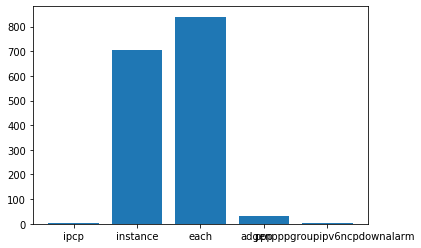

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

D = words_counter
x = np.array(list(D.keys())[1:])
y = np.array(list(D.values())[1:])
print(type(x))
print(x[0:10])
plt.bar(x[1000:1005],y[1000:1005])
plt.show()